# Automated scan reader

Check if a clustering method should read handscript digits, then train a solid classification model CNN based.

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Learning machine imports
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Non supervized analysis (Clustering) imports
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier

# Supervized classification (Logistic regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Loading dataset

Based on 8x8 frame, load digits in non supervized logistic regression

In [2]:
digits = load_digits()
X, y = digits.data, digits.target

# Some logs
print(f"Raw data X shape: {X.shape}")
print(f"Labels y shape:{y.shape}")
print(f"Unique classes number: {len(np.unique(y))}")

Raw data X shape: (1797, 64)
Labels y shape:(1797,)
Unique classes number: 10


## Stats and Viz

1. Descriptive statistics : datas are pixel intensities (from 0 to 16 for Digits dataset)

In [3]:
X_df = pd.DataFrame(X)
print("\nPixel intenstity descriptive stats:")
print(X_df.describe().T[['min', 'max', 'mean', 'std']].head())


Pixel intenstity descriptive stats:
   min   max       mean       std
0  0.0   0.0   0.000000  0.000000
1  0.0   8.0   0.303840  0.907192
2  0.0  16.0   5.204786  4.754826
3  0.0  16.0  11.835838  4.248842
4  0.0  16.0  11.848080  4.287388


2. Digit view (exploration mode)

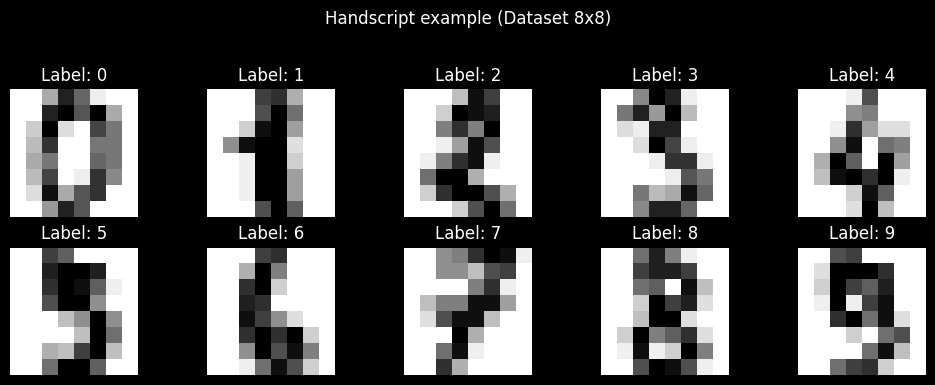

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
fig.suptitle("Handscript example (Dataset 8x8)")

# Loop through axes to remodelling vector
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(8,8), cmap="gray_r")
    ax.set_title(f"Label: {y[i]}")
    ax.axis("off")
plt.tight_layout(rect=(0, 0.03, 1, 0.95))
plt.show()

3. Check for dataset balance

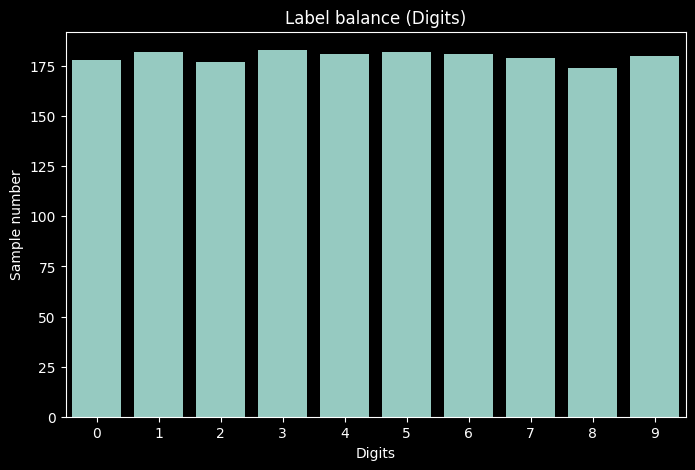


Sample by class count:
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64


In [5]:
plt.figure(figsize=(8,5))
sns.countplot(x=y)
plt.title('Label balance (Digits)')
plt.xlabel('Digits')
plt.ylabel('Sample number')
plt.show()

print("\nSample by class count:")
print(pd.Series(y).value_counts().sort_index())

## Preprocess Pipeline : Scaling

Clustering and logistic regression needs scaled data, avoiding some chars dominate distance computation.
Use MinMaxScaler to scale data between [0, 1] (better scale for images)

In [6]:
# 1. Normalization using MinMax
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("\nAfter normalization (MinMaxScaler):")
X_scaled_df = pd.DataFrame(X_scaled)
print(X_scaled_df.describe().T[['min', 'max', 'mean', 'std']].head())
# X_scaled is ready


After normalization (MinMaxScaler):
   min  max      mean       std
0  0.0  0.0  0.000000  0.000000
1  0.0  1.0  0.037980  0.113399
2  0.0  1.0  0.325299  0.297177
3  0.0  1.0  0.739740  0.265553
4  0.0  1.0  0.740505  0.267962


## Supervized classification
- Split dataset : training and test to evaluate generalization

In [7]:
# Use 80/20 strategy
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
# View split result

X_train shape: (1437, 64)
X_test shape: (360, 64)


# Logistic regression training

We have 10 classes to classify, using **max_iter** parameter ensure convergence (often required for multi classes issues)

In [8]:
log_reg = LogisticRegression(solver="lbfgs", max_iter=2000, random_state=42)

# Train model
print("Logistic regression start...")
log_reg.fit(X_train, y_train)
print("Logistic regression training done!")

# Prediction to train dataset
y_pred = log_reg.predict(X_test)

Logistic regression start...
Logistic regression training done!


## Classification report

Model evaluation using Accuracy, report (precision, recall, F1-score and confusion matrix)


## Classification report for Logistic regression (8x8) ##
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.88      0.83      0.86        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.95      1.00      0.97        36
           5       0.97      1.00      0.99        37
           6       0.97      0.94      0.96        36
           7       0.97      1.00      0.99        36
           8       0.91      0.89      0.90        35
           9       0.94      0.94      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360


Exactitude (Accuracy) for whole test : 0.9583


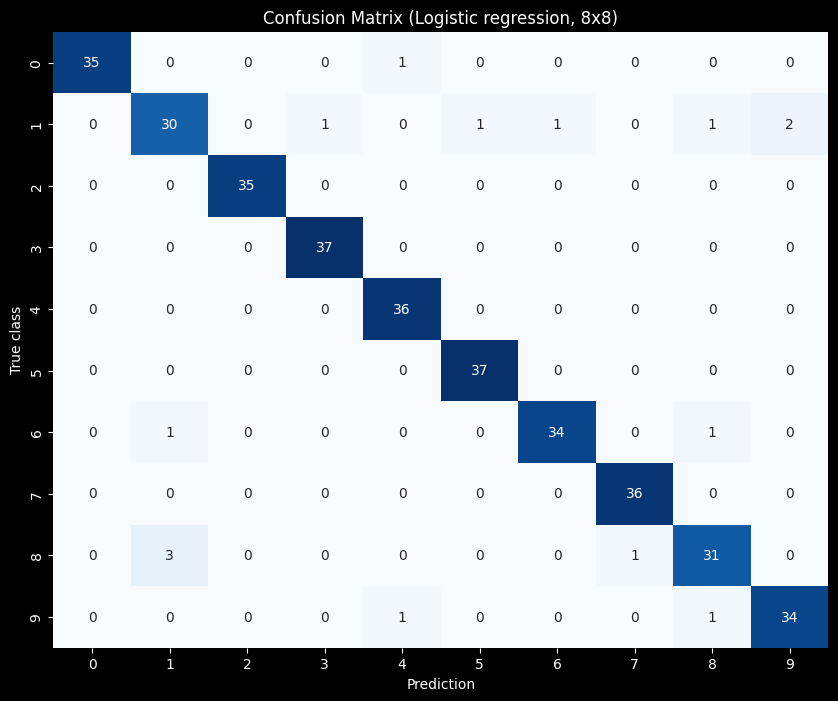

In [9]:
print("\n## Classification report for Logistic regression (8x8) ##")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitude (Accuracy) for whole test : {accuracy:.4f}")

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=digits.target_names,
    yticklabels=digits.target_names
)
plt.title('Confusion Matrix (Logistic regression, 8x8)')
plt.xlabel('Prediction')
plt.ylabel('True class')
plt.show()
# Required to show matrix

# Qualitative analysis
Expected for a logistic regression a performance between 95 - 97% of accuracy)


Bad classfied samples number: 15


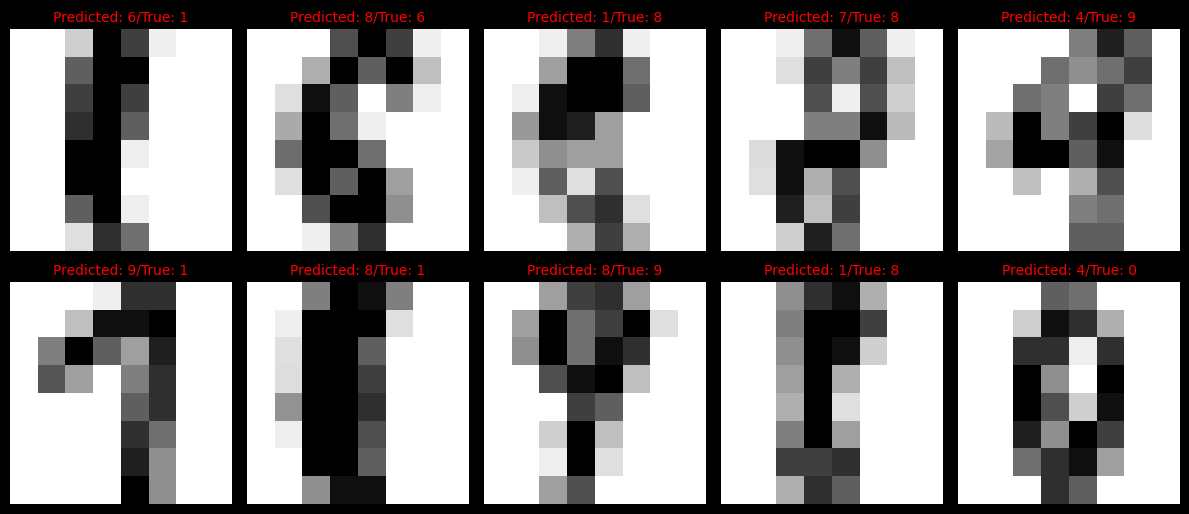

In [10]:
# Find bad classified sample indices
misclassified_indices = np.where(y_test != y_pred)[0]

print(f"\nBad classfied samples number: {len(misclassified_indices)}")

# ten first bads
plt.figure(figsize=(12, 6))
fig.suptitle('Bad classified digits (Logistic regression)')

for plot_index, bad_index in enumerate(misclassified_indices[:10]):
    ax = plt.subplot(2, 5, plot_index + 1)
    # 64 Vector resampling le vecteur to 8x8 matrix
    ax.imshow(X_test[bad_index].reshape(8, 8), cmap='gray_r')
    ax.set_title(
        f"Predicted: {y_pred[bad_index]}/True: {y_test[bad_index]}",
        fontsize=10,
        color='red'
    )
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# Required to really show

# Non supervized analysis : Clustering

Global idea : estimate if digits naturally gathers in the pixels spaces.
We reduce dataset (8x8 => 64 dimensions) to 2 or 3 dimensions using PCA (Principal Components Analysis)

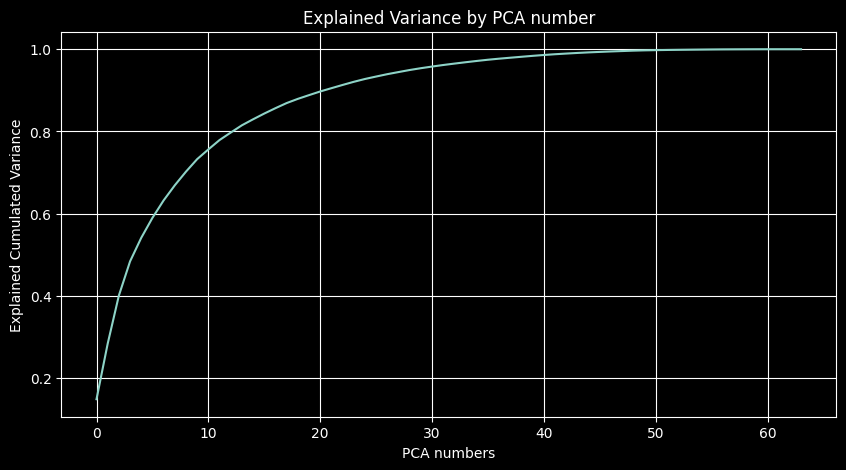

Data shape after PCA : (1797, 2)
Explained Variance by two components : 0.28


In [11]:
# 1. Adjust PCA to detect components optimal number (non required, but usefull information)
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('PCA numbers')
plt.ylabel('Explained Cumulated Variance')
plt.title('Explained Variance by PCA number')
plt.grid(True)
plt.show()

# 2. Reduce to two dims for dataviz
pca_2d = PCA(n_components=2, random_state=42)
X_pca = pca_2d.fit_transform(X_scaled)

print(f"Data shape after PCA : {X_pca.shape}")
print(f"Explained Variance by two components : {np.sum(pca_2d.explained_variance_ratio_):.2f}")
#

## Training and prediction

K-Means is usefull when we know cluster number. Here, we know we have 10 classes

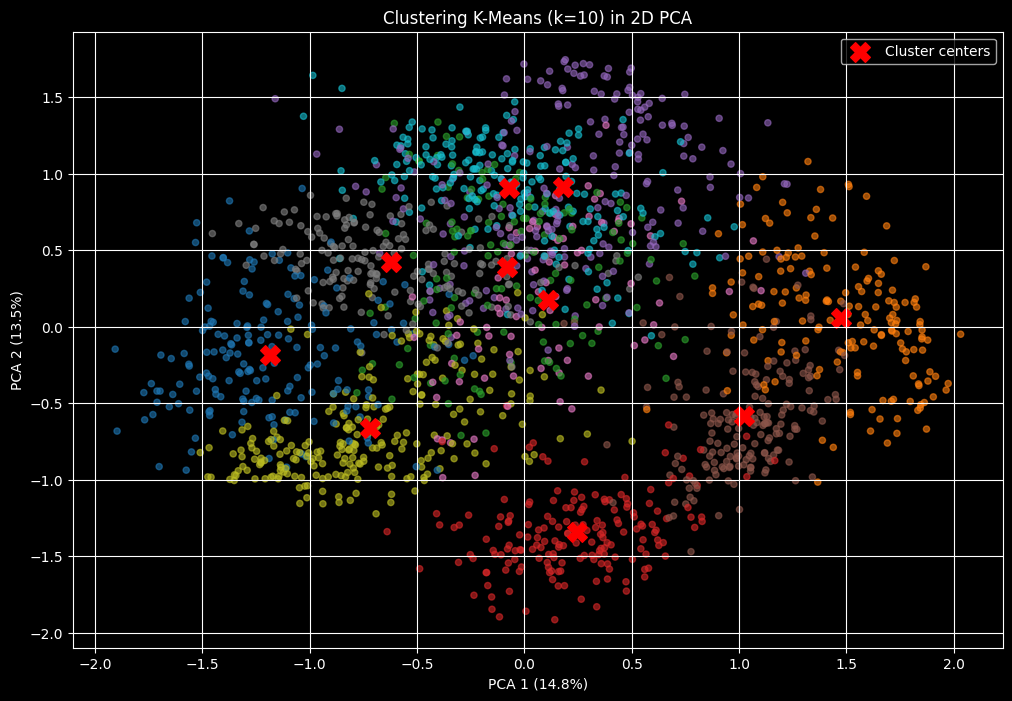

In [12]:
# Fix k=10 real and known class number
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X_scaled) # K-Means is trained on whole datas (dim 64) not on PCA
y_kmeans = kmeans.predict(X_scaled)


# Clusters centers projection in PCA 2D space
centers_pca = pca_2d.transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y_kmeans,
    cmap='tab10',
    alpha=0.6,
    s=20
)

# Display cluster center
plt.scatter(
    centers_pca[:, 0],
    centers_pca[:, 1],
    marker='X',
    s=200,
    c='red',
    label='Cluster centers'
)

plt.title('Clustering K-Means (k=10) in 2D PCA')
plt.xlabel(f'PCA 1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PCA 2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
plt.legend()
plt.grid(True)
plt.show()

Clusters are not ordered, it's required to check the real label **dominance** in each cluster 


## Contingency table : True Labels by K-Means Cluster ##
True_Label       0   1    2    3    4    5    6    7    8    9
Cluster_Label                                                 
0                0   1   15  157    0    2    0    0    2    9
1                1   0    0    0  167    2    0    0    0    0
2                0   1    0    2    0  125    0    0    5    5
3              177   0    1    0    0    0    1    0    0    0
4                0  99    8    7    4    0    3    3  102    2
5                0   2    0    0    0    2  177    0    2    0
6                0  55    2    0    3    0    0    0    5   20
7                0  24  148    1    0    0    0    0    3    0
8                0   0    0    9    0   51    0    0   51  137
9                0   0    3    7    7    0    0  176    4    7


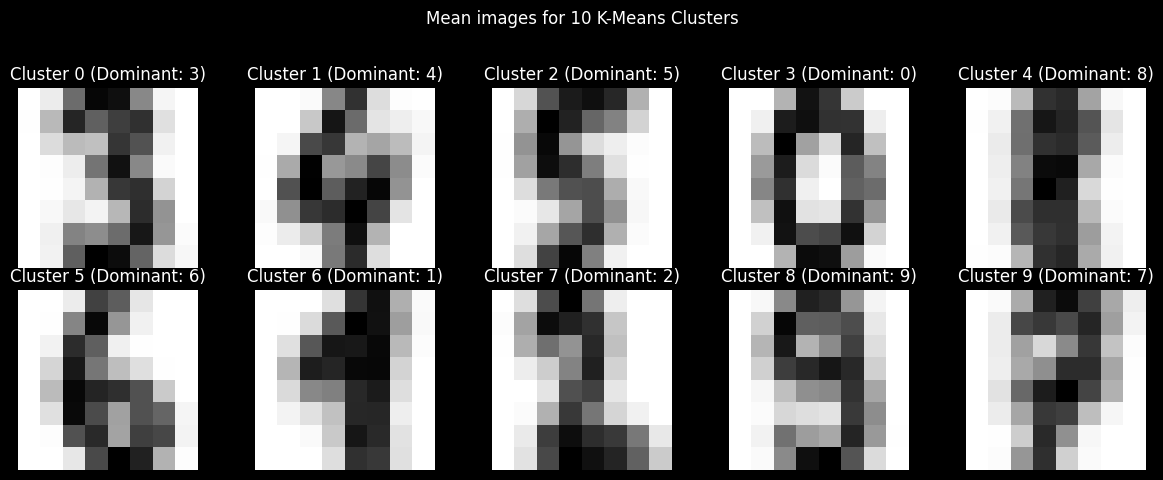

In [13]:
# Create Dataframe to cluster analysis
df_analysis = pd.DataFrame({'True_Label': y, 'Cluster_Label': y_kmeans})

# Contingency table (Cluster vs True Label)
contingency_table = pd.crosstab(df_analysis['Cluster_Label'], df_analysis['True_Label'])

print("\n## Contingency table : True Labels by K-Means Cluster ##")
print(contingency_table)

# "Mean images" viz for each cluster (centered cluster image)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Mean images for 10 K-Means Clusters')

for i, ax in enumerate(axes.flat):
    # Get cluster center i
    cluster_center = kmeans.cluster_centers_[i]
    
    # Display cluster center as 8x8 image
    ax.imshow(cluster_center.reshape(8, 8), cmap='binary')
    
    # Find dominant label in that cluster
    dominant_label = contingency_table.loc[i].idxmax()
    ax.set_title(f"Cluster {i} (Dominant: {dominant_label})")
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Using DBSCAN :

DBSCAN is based on density algorithm, hard to tune (requiring **eps** and **min_samples** to be efficient). Its a good approach to identify arbitrary shape clusters and outliers.

DBSCAN is normalization and parameters sensitive, so we use a small parameters set to illustrate
Also DBSCAN is not really efficient with hight dimensions and is very slow. So we apply only on previous PCA 2D


## DBSCAN results (PCA 2D) ##
Found clusters : 1
Noise samples classified : 0


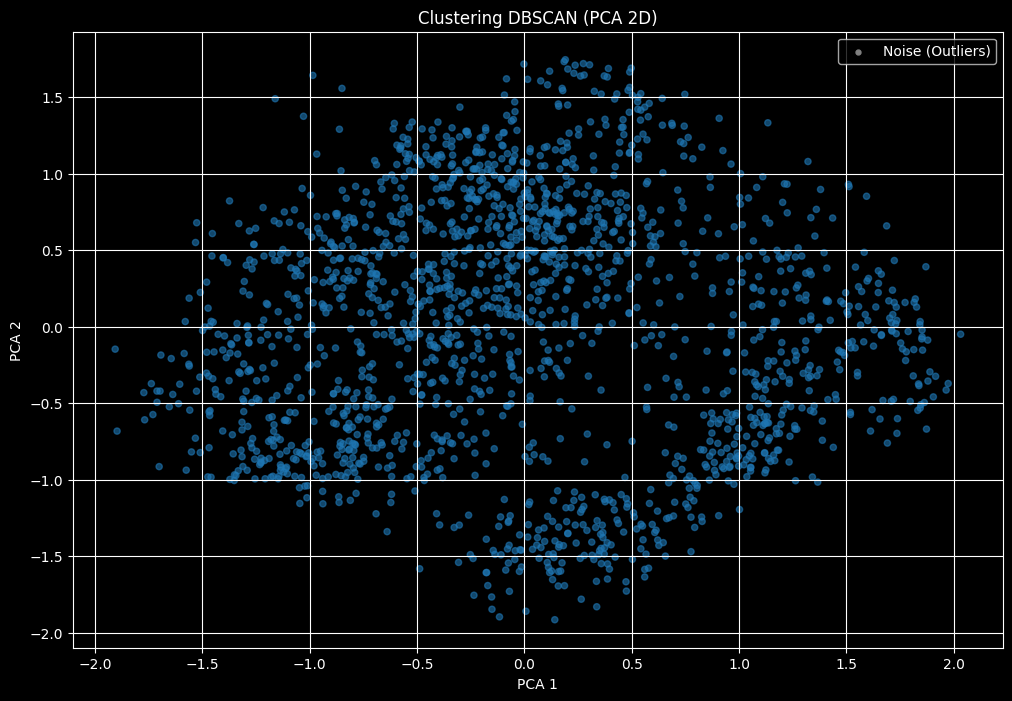

In [14]:
dbscan = DBSCAN(eps=0.5, min_samples=5) # Parameters must be adjusted
y_dbscan = dbscan.fit_predict(X_pca) # Applied to PCA 2D

n_clusters = len(np.unique(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise = np.sum(y_dbscan == -1)

print(f"\n## DBSCAN results (PCA 2D) ##")
print(f"Found clusters : {n_clusters}")
print(f"Noise samples classified : {n_noise}")

# DBSCAN clusters viz
plt.figure(figsize=(12, 8))
plt.scatter(
    X_pca[y_dbscan != -1, 0],
    X_pca[y_dbscan != -1, 1],
    c=y_dbscan[y_dbscan != -1],
    cmap='tab10',
    alpha=0.6,
    s=20
)
plt.scatter(
    X_pca[y_dbscan == -1, 0],
    X_pca[y_dbscan == -1, 1],
    c='grey',
    marker='.',
    s=50,
    label='Noise (Outliers)'
)
plt.title('Clustering DBSCAN (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()
# ...

## KNN (Using clusters for evaluation)

KNN model is not a clustering algorithm but usefull to evaluate clustering structure quality.
Without pure labels for clustering evaluation (Adjusted Rand Index ou Homogeneity Score) KNN can be used as simple classifier to predict True labels from False labels (mapping)

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)

# Training on 64D normalized datas
knn.fit(X_train, y_train)

# Prediction and evaluation
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nAccuracy of K-Nearest Neighbors (KNN) on 8x8 dataset : {accuracy_knn:.4f}")
#...


Accuracy of K-Nearest Neighbors (KNN) on 8x8 dataset : 0.9833


## CNN : Convolutive Neural Network

- CNN will interoperate with Keras (from Tensorflow). Keras is a high level library, usefull for deep neurons networks architecture

### Load MNIST dataset (instead of 8x8 used with regression)

In [16]:
# Specifics CNN
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset (28x28)
(X_cnn_train, y_cnn_train), (X_cnn_test, y_cnn_test) = mnist.load_data()

print(f"X_cnn_train shape: {X_cnn_train.shape}")
print(f"X_cnn_test shape: {X_cnn_test.shape}")
print(f"y_cnn_train shpae: {y_cnn_train.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
X_cnn_train shape: (60000, 28, 28)
X_cnn_test shape: (10000, 28, 28)
y_cnn_train shpae: (60000,)


## CNN preprocess

- Scaling and normalization from [0, 255] pixels to [0,1] shape
- 2D redim: MNIST use only grayscale so one channel is needed (4D tensors for CNN : (sample number, height, width, channels))
- Labels encoding : CNN is a multi-class classifier, output layer have 10 neurons (1 per class) Loss is better computed if we encode in **one-hot**

In [17]:
# Pixel intensity normalization
X_cnn_train = X_cnn_train.astype('float32') / 255.0
X_cnn_test = X_cnn_test.astype('float32') / 255.0

# Redim channel (1 pour les niveaux de gris)
X_cnn_train = np.expand_dims(X_cnn_train, -1)
X_cnn_test = np.expand_dims(X_cnn_test, -1)

print(f"X_cnn_train (28x28x1) new shape : {X_cnn_train.shape}")

# One-Hot Encoding labels
y_cnn_train_cat = to_categorical(y_cnn_train, num_classes=10)
y_cnn_test_cat = to_categorical(y_cnn_test, num_classes=10)

print(f"Encoded labels shape : {y_cnn_train_cat.shape}")
# ...

X_cnn_train (28x28x1) new shape : (60000, 28, 28, 1)
Encoded labels shape : (60000, 10)


## CNN is structured around **convolution** layers (extract local features) and **pooling** to reduce dim and make model more stable

In [18]:
def create_cnn_model(input_shape=(28, 28, 1), num_classes=10):
    model = Sequential([
        # Convolution 1 layer: Learn 32 filters (features)
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        # Pooling 1 layer: Size reducer (28x28 -> 14x14)
        MaxPooling2D((2, 2)),
        
        # Convolution 2 layer : Learn 64 filters
        Conv2D(64, (3, 3), activation='relu'),
        # Pooling 2 layer : Reduce size (14x14 -> 7x7)
        MaxPooling2D((2, 2)),
        
        # Flattening : Transform 3D volume to 1D vector for dense layers
        Flatten(),
        
        # Dense layer (Fully Connected) : 128 neurons
        Dense(128, activation='relu'),
        # Dropout : Deactivate 50% of neurons to prevent overfitting
        Dropout(0.5),
        
        # Output layer : 10 classes, activation function : 'softmax' for probabilities
        Dense(num_classes, activation='softmax')
    ])
    
    # Model compilation
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy', # Adapté pour le One-Hot Encoding
        metrics=['accuracy']
    )
    return model

cnn_model = create_cnn_model()
cnn_model.summary()

/Users/jlaubert/.pyenv/versions/regression/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## CNN model training on the whole training dataset

In [ ]:
history = cnn_model.fit(
    X_cnn_train,
    y_cnn_train_cat,
    epochs=10,  # Iterations number
    batch_size=128,
    validation_split=0.1, # Split train set for evaluation (10%)
    verbose=1
)

Epoch 1/10


## Final evaluation

In [ ]:
loss, accuracy_cnn = cnn_model.evaluate(X_cnn_test, y_cnn_test_cat, verbose=0)

print(f"\n## CNN performance on the test set (28x28) ##")
print(f"Loss : {loss:.4f}")
print(f"Accuracy : {accuracy_cnn:.4f}")
# Expected about 99% (better than other model for image classification)

# Model predictions (probabilities)
y_prob_cnn = cnn_model.predict(X_cnn_test)
# Probabilities to predicted class conversion (max)
y_pred_cnn = np.argmax(y_prob_cnn, axis=1)

# Confusion Matrix computation
conf_mat_cnn = confusion_matrix(y_cnn_test, y_pred_cnn)

plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_mat_cnn,
    annot=True,
    fmt='d',
    cmap='Greens',
    cbar=False,
    xticklabels=range(10),
    yticklabels=range(10)
)
plt.title('Confusion Matrix (CNN, 28x28)')
plt.xlabel('Prediction')
plt.ylabel('True Class')
plt.show()

# Bad classified samples
misclassified_indices_cnn = np.where(y_cnn_test != y_pred_cnn)[0]

print(f"\nCNN classification errors : {len(misclassified_indices_cnn)}")

# ten first display
plt.figure(figsize=(12, 6))
fig.suptitle('(CNN) bad classified digits')

for plot_index, bad_index in enumerate(misclassified_indices_cnn[:10]):
    ax = plt.subplot(2, 5, plot_index + 1)
    ax.imshow(X_cnn_test[bad_index].reshape(28, 28), cmap='gray_r')
    ax.set_title(
        f"Predicted: {y_pred_cnn[bad_index]}\nTrue: {y_cnn_test[bad_index]}",
        fontsize=10,
        color='red'
    )
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# ...

# 🏆 Final report : Comparative handscript reading systems

This report summarize performances and confidence of the three ways applyied for handscript digits classification.

---

## I. Classification performance summary

| Model | Dataset | Accuracy | Image resolution | Model complexity |
| :--- | :--- | :--- | :--- | :--- |
| **Logistic regression (LR)** | Digits (8x8) | **0.96** | Very poor | Ligthweight, quick |
| **K-Nearest Neighbors (KNN)** | Digits (8x8) | **0.98** | Very poor | Lightweight, Distance based |
| **Convolution Neural Network (CNN)** | MNIST (28x28) | **0.99** | High | Complex, very strong |

---

## II. Different ways analysis

### 1. Logisitical Regression (Lightweight model)

* **Performance (8x8) :** Accuracy is almost good, about **95%**, even with a poor definition, digits can be splitted in the pixel spaces.
* **Relevance (Lightweight model) :** **Good.** For embedded app or limited resources, LR provide a good balance between performance and calcul cost (low training and prediction time)
* **Confusion matrix analysis :** Mistakes results of **missing datas** (poor resolution 8x8).

### 2. K-Means (Non supervized analysis)

* **Observation :** Le K-Means successfully identified **10 distinct clusters** in the 64D space, without knowing any labels. Data structure analysis confirms that digits are clearly splitted.
* **Conclusion :** Non supervised analysis enforce hypothesis that digits visual features can result in separate groups.

### 3. Convolution Neural Network (CNN - Strong model)

* **Performance (28x28) :** Really hight accuracy (more than **> 99%**). It's the **strongest** model and the one the most **generalizable**.
* **Relevance** :** **Ideal.** Convolutives layers can capture local patterns (bounds, corners, curves), with a poor sensibility on variations and scales. Thus it's the best choice for an automated handscript reader with high image quality (28x28).
* **Matrix convolution analysis :** Really poor mistakes. Mistakes come from really bad hand writing.

---

## III. Conclusion and Recommandations

### 1. Automated Reader System: Robustness

To get the **best accuray** and minimize read mistakes, **Convolution Neural Network (CNN)** is the best solution. Generalization capability is better than all others.

### 2. Lightweight models vs. Performant model (Compromise)

* **If speed is needed and system is deployed on poor gpu :** Use **Logistic Regression** with 8x8 image resolution.
* **If you want to reach an extrem accuracy:** Use **CNN** with 28x28 image resolution.

---

# Store CNN model and try to get it back

In [ ]:
import os

# 1. Set store path
model_save_path = 'mnist_cnn_model.h5'

# 2. Saving model
cnn_model.save(model_save_path)

print(f"\nCNN Model was successfully saved with HDF5 format: {os.path.abspath(model_save_path)}")

# Try to load model from Keras
from tensorflow.keras.models import load_model

try:
    loaded_model = load_model(model_save_path)
    print("\nSucessfully model loading...")

    # 2. Check performances
    loss_loaded, accuracy_loaded = loaded_model.evaluate(X_cnn_test, y_cnn_test_cat, verbose=0)

    print(f"Performance (Accuracy) : {accuracy_loaded:.4f}")

    # Check with previous performance (no degradation)
    if accuracy_loaded == accuracy_cnn:
        print("Matching success. File is okay")
    else:
        print("Warning some regression was detected. Please re-train")

except Exception as e:
    print(f"Error loading model : {e}")